<a href="https://colab.research.google.com/github/Ohalu909/ML-Lab/blob/main/ML_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Manipulation
import numpy as np
import pandas as pd
from   pandas import DataFrame
import math

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data Preparation - Load the given dataset of chemical information about wine.
Merge the two datasets and prepare the data for modeling.
Split the dataset into training, validation and testing sets for model evaluation.

In [ ]:
# read the data and store data
red_wine_data = pd.read_csv('/content/drive/MyDrive/ML Lab 2/winequality-red.csv', delimiter=';')
white_wine_data = pd.read_csv('/content/drive/MyDrive/ML Lab 2/winequality-white.csv', delimiter=';')
# Merge the two datasets
merged_df = pd.concat([red_wine_data, white_wine_data], ignore_index=True)

# print a summary of the data
print(merged_df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [ ]:
# Scaling/normalizing numerical values
from sklearn.preprocessing import MinMaxScaler

# create a MinMaxScaler object
scaler = MinMaxScaler()

# fit the scaler object to the data and transform the data
normalized_data = scaler.fit_transform(merged_df)

# convert the normalized data back to a pandas dataframe
normalized_df = pd.DataFrame(normalized_data, columns=merged_df.columns)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and temporary sets
X_train_temp, X_test, y_train_temp, y_test = train_test_split(normalized_df.drop('quality', axis=1), merged_df['quality'], test_size=0.2, random_state=42)

# Further split the temporary set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42)

# Display the sizes of the split sets
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 3897
Validation set size: 1300
Testing set size: 1300


# 2. Model Development – Design 5 different neural network architectures to be trained.
Show the network architecture in figures.
Train the neural network models using the training dataset and evaluate the model with validation data.
Analyse the training and validation loss curve and report your observations and analysis.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_dim = 11
embedding_dim = 1
max_seq_length = 1
output_dim = 11
input_length = 11

# 1. Multilayer Perceptron (MLP)
model_mlp = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# 2. Single Layer Perceptron (SLP)
model_slp = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    layers.Dense(1)
])

# 3. Recurrent Neural Network (RNN)
model_rnn = keras.Sequential([
    layers.Embedding(input_dim, output_dim=embedding_dim, input_length=max_seq_length),
    layers.LSTM(64),
    layers.Dense(1)
])

# 4. Long Short-Term Memory (LSTM)
model_lstm = keras.Sequential([
    layers.Embedding(input_dim, output_dim=embedding_dim, input_length=max_seq_length),
    layers.GRU(64),
    layers.Dense(1)
])

# 5. Feed Forward
model_fnn = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the models
model_mlp.compile(optimizer='adam', loss='mse')
model_slp.compile(optimizer='adam', loss='mse')
model_rnn.compile(optimizer='adam', loss='mse')
model_lstm.compile(optimizer='adam', loss='mse')
model_fnn.compile(optimizer='adam', loss='mse')

# Train the models
print('-----model_mlp-----')
history_mlp = model_mlp.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
print('\n-----model_slp-----')
history_slp = model_slp.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
print('\n-----model_rnn-----')
history_rnn = model_rnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
print('\n-----model_lstm-----')
history_lstm = model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
print('\n-----model_fnn-----')
history_fnn = model_fnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))



-----model_mlp-----
Epoch 1/10
122/122 [==============================] - 1s 3ms/step - loss: 10.9516 - val_loss: 0.8096
Epoch 2/10
122/122 [==============================] - 0s 2ms/step - loss: 0.7226 - val_loss: 0.7262
Epoch 3/10
122/122 [==============================] - 0s 2ms/step - loss: 0.6721 - val_loss: 0.6894
Epoch 4/10
122/122 [==============================] - 0s 3ms/step - loss: 0.6463 - val_loss: 0.6552
Epoch 5/10
122/122 [==============================] - 1s 4ms/step - loss: 0.6180 - val_loss: 0.6350
Epoch 6/10
122/122 [==============================] - 1s 4ms/step - loss: 0.6026 - val_loss: 0.6136
Epoch 7/10
122/122 [==============================] - 1s 4ms/step - loss: 0.5833 - val_loss: 0.6007
Epoch 8/10
122/122 [==============================] - 0s 4ms/step - loss: 0.5657 - val_loss: 0.5865
Epoch 9/10
122/122 [==============================] - 0s 4ms/step - loss: 0.5509 - val_loss: 0.5851
Epoch 10/10
122/122 [==============================] - 0s 4ms/step - loss: 0.55

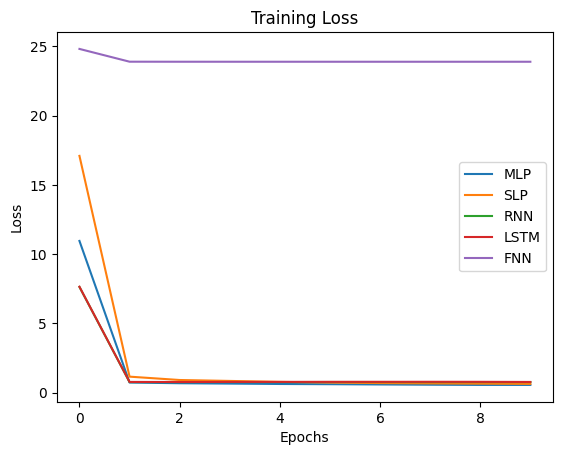

In [ ]:
# Plot the loss curves
plt.plot(history_mlp.history['loss'], label='MLP')
plt.plot(history_slp.history['loss'], label='SLP')
plt.plot(history_rnn.history['loss'], label='RNN')
plt.plot(history_lstm.history['loss'], label='LSTM')
plt.plot(history_fnn.history['loss'], label='FNN')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Based on above loss curve:
- FNN has the biggest or maximum loss and it is barely changed throught the 10 epochs. Hence, its perfomance it the poorest among the other architecture.
- SLP has a large loss during the first few epochs but it is gradually became smaller through the next epochs.
- MLP has a large but smaller loss compared to SLP during the first few epochs and gradually become smaller through the next epochs. Reaching the end of epoch, MLP loss is the smallest or minimum among the other architecture.
- RNN and LSTM has the same loss during the first few epoch and it is smaller compared to MLP at the beginning. But, their final loss is not the minimum.

# 3. Model Tuning – Choose the best model architecture based on Step 2 and perform hyperparameter tuning.
Justify the reason on how you decide the best model.
Identify the hyperparameters you wish to tune (e.g activation function,learning rate, optimizer etc).
Perform a systematic analysis to analyse the performance of the identified model
with different hyperparameters.
Report your results in a table.

The best model based on step 2 is neural network with Multi Layer Perceptron(MLP). It is the best model because its value of loss at the end of the epochs is the smallest or minimum. The goal of training process is to minimize the loss function, so the model could learn to make more accurate predictions. Hence MLP is the best model among the 5 neural network architecture.


---

Hyperparameters that we will use for this model tuning is activation function and optimizer.

In [ ]:
model_mlp_1 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(1)
])

model_mlp_2 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    layers.Dense(64, activation='elu'),
    layers.Dense(1)
])

model_mlp_1.compile(optimizer='adam', loss='mse')
model_mlp_2.compile(optimizer='adam', loss='mse')

print('-----model_mlp_1-----')
history_mlp_1 = model_mlp_1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
print('-----model_mlp_2-----')
history_mlp_2 = model_mlp_2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


-----model_mlp_1-----
Epoch 1/10
122/122 [==============================] - 2s 5ms/step - loss: 11.5471 - val_loss: 0.8129
Epoch 2/10
122/122 [==============================] - 0s 3ms/step - loss: 0.7226 - val_loss: 0.7628
Epoch 3/10
122/122 [==============================] - 0s 3ms/step - loss: 0.6760 - val_loss: 0.7164
Epoch 4/10
122/122 [==============================] - 0s 4ms/step - loss: 0.6349 - val_loss: 0.6671
Epoch 5/10
122/122 [==============================] - 0s 4ms/step - loss: 0.6013 - val_loss: 0.6385
Epoch 6/10
122/122 [==============================] - 0s 3ms/step - loss: 0.5815 - val_loss: 0.6167
Epoch 7/10
122/122 [==============================] - 0s 4ms/step - loss: 0.5685 - val_loss: 0.6050
Epoch 8/10
122/122 [==============================] - 0s 4ms/step - loss: 0.5628 - val_loss: 0.5955
Epoch 9/10
122/122 [==============================] - 0s 4ms/step - loss: 0.5541 - val_loss: 0.5850
Epoch 10/10
122/122 [==============================] - 0s 3ms/step - loss: 0.

In [ ]:
model_mlp_3 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(1)
])

model_mlp_3.compile(optimizer='sgd', loss='mse')

print('-----model_mlp_3-----')
history_mlp_3 = model_mlp_3.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


-----model_mlp_3-----
Epoch 1/10
122/122 [==============================] - 1s 3ms/step - loss: 1.2898 - val_loss: 0.8435
Epoch 2/10
122/122 [==============================] - 0s 2ms/step - loss: 0.7260 - val_loss: 0.7920
Epoch 3/10
122/122 [==============================] - 0s 2ms/step - loss: 0.7161 - val_loss: 0.7959
Epoch 4/10
122/122 [==============================] - 0s 2ms/step - loss: 0.7028 - val_loss: 0.7792
Epoch 5/10
122/122 [==============================] - 0s 2ms/step - loss: 0.6909 - val_loss: 0.7661
Epoch 6/10
122/122 [==============================] - 0s 2ms/step - loss: 0.6797 - val_loss: 0.7341
Epoch 7/10
122/122 [==============================] - 0s 2ms/step - loss: 0.6681 - val_loss: 0.7209
Epoch 8/10
122/122 [==============================] - 0s 2ms/step - loss: 0.6551 - val_loss: 0.7162
Epoch 9/10
122/122 [==============================] - 0s 2ms/step - loss: 0.6423 - val_loss: 0.7066
Epoch 10/10
122/122 [==============================] - 0s 2ms/step - loss: 0.6

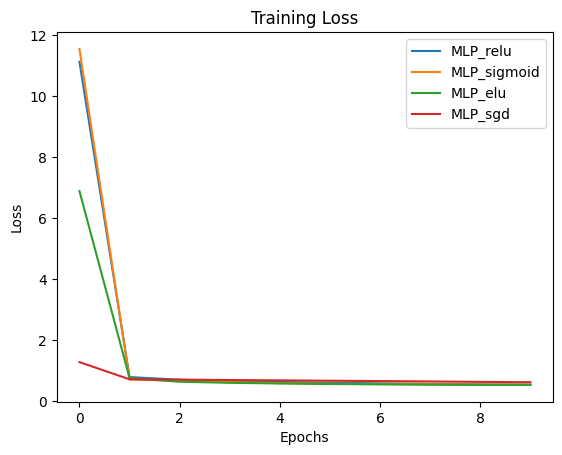

In [ ]:
plt.plot(history_mlp.history['loss'], label='MLP_relu')
plt.plot(history_mlp_1.history['loss'], label='MLP_sigmoid')
plt.plot(history_mlp_2.history['loss'], label='MLP_elu')
plt.plot(history_mlp_3.history['loss'], label='MLP_sgd')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

After tuning the model using different activation funtion, Exponential linear Unit (ELU) resulted in the smallest or minimum loss among the 3 activation function used (RELU, Sigmoid, and ELU). Hence, neural network with MLP and ELU as activation function has the best perfomance


---
After tuning with different optimizer, using Adam optimizer resulted in the smallest or minimum loss compared to using SGD optimizer. Hence, MLP with Adam optimizer has the best performance.


| Activation function | RELU | Sigmoid | ELU|
|----------|----------|----------|--------|
|   Loss after 10 epochs |   0.5500  |  0.5483  | 0.5429|


---

| Optimizer | Adam | SGD |
|----------|----------|----------|
|   Loss after 10 epochs |   0.5500  |  0.6310  |



# 4. Model Evaluation – Using the best model that you have identified in Step 3, evaluate its performance on testing data.
Compare your validation and testing results using appropriate evaluation metrics.
Report your observation and discuss the results.

In [ ]:
# Evaluate the model on the validation data
accuracy_val = model_mlp_2.evaluate(X_val, y_val)

# Evaluate the model on the test data
accuracy_test = model_mlp_2.evaluate(X_test, y_test)

# Print the accuracy
print("Validation result Accuracy:", accuracy_val)
print("Testing result Accuracy:", accuracy_test)


41/41 [==============================] - 0s 2ms/step - loss: 0.6265
Validation result Accuracy: 0.6357679963111877
Testing result Accuracy: 0.6264781355857849


Based on the accuracy, validation result accuracy is slightly higher than test result accuracy by 0.0093. This indicates that the model's performance on the validation set is a good estimate of its perfomance on unseen data. If the difference is significantly big, then the model is overfit. But in this case, the model performed is well-fitting.